In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Basic info
df.info()

# Preview top records
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Count missing values per column
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [5]:
# Drop columns with excessive missing data
df.drop(columns=['ca', 'thal', 'slope'], inplace=True)

# Drop rows with remaining missing values
df.dropna(inplace=True)

# Confirm no missing values
df.isnull().sum()


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

In [7]:
# Inspect target variable distribution
df['num'].value_counts()

# Convert target to binary: 0 = No Disease, 1 = Disease
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['num'], inplace=True)


In [9]:
# One-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang'], drop_first=True)
df_encoded.head()


,id,age,dataset,trestbps,chol,thalch,oldpeak,target,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True
0,1,63,Cleveland,145.0,233.0,150.0,2.3,0,True,False,False,True,True,False,False,False
1,2,67,Cleveland,160.0,286.0,108.0,1.5,1,True,False,False,False,False,False,False,True
2,3,67,Cleveland,120.0,229.0,129.0,2.6,1,True,False,False,False,False,False,False,True
3,4,37,Cleveland,130.0,250.0,187.0,3.5,0,True,False,True,False,False,True,False,False
4,5,41,Cleveland,130.0,204.0,172.0,1.4,0,False,True,False,False,False,False,False,False


In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['id', 'dataset', 'target'])  # Features
y = df_encoded['target']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8040540540540541

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        71
           1       0.81      0.82      0.81        77

    accuracy                           0.80       148
   macro avg       0.80      0.80      0.80       148
weighted avg       0.80      0.80      0.80       148

Confusion Matrix:
 [[56 15]
 [14 63]]


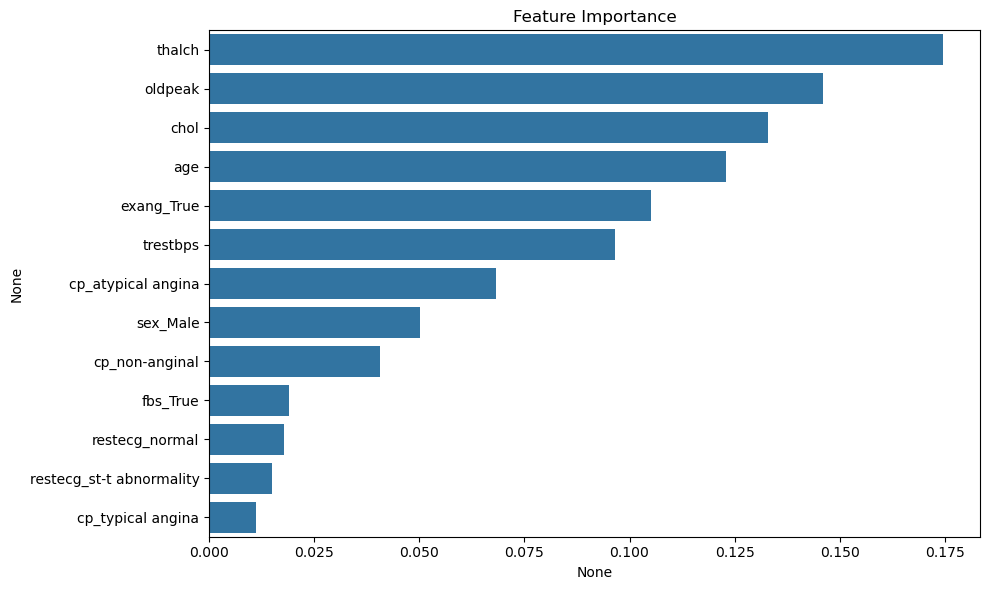

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
